In [64]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
import utils


In [65]:
def convolve_im_freq(im: np.array, fft_kernel: np.array, verbose=True):
    """Convolves the image (im) with the frequency kernel (fft_kernel) in the frequency domain.

    Args:
        im: np.array of shape [H, W] - grayscale image
        fft_kernel: np.array of shape [H, W] - filter kernel in frequency domain
        verbose: bool - if True, shows intermediate visualizations

    Returns:
        conv_result: np.array of shape [H, W] - filtered image in spatial domain
    """
    im_fft = np.fft.fft2(im)
    im_fft_shifted = np.fft.fftshift(im_fft) 

    fft_kernel_centered = np.fft.fftshift(fft_kernel) 

    filtered_fft = im_fft_shifted * fft_kernel_centered

    filtered_fft_shifted_back = np.fft.ifftshift(filtered_fft)
    im_filtered = np.fft.ifft2(filtered_fft_shifted_back)

    conv_result = np.real(im_filtered)

    # Visualization if verbose is enabled
    if verbose:
        plt.figure(figsize=(20, 4))

        # Original Image
        plt.subplot(1, 5, 1)
        plt.imshow(im, cmap="gray")
        plt.title("Original Image")

        # Amplitude of the FFT of the Original Image
        plt.subplot(1, 5, 2)
        plt.imshow(np.log(1 + np.abs(im_fft_shifted)), cmap="gray")  # Log transform for visibility
        plt.title("FFT of Original Image (Shifted)")

        # Amplitude of the Centered Filter Kernel
        plt.subplot(1, 5, 3)
        plt.imshow(np.log(1 + np.abs(fft_kernel_centered)), cmap="gray")  # Log transform for visibility
        plt.title("Centered FFT Kernel")

        # Amplitude of the Filtered FFT Image
        plt.subplot(1, 5, 4)
        plt.imshow(np.log(1 + np.abs(filtered_fft)), cmap="gray")  # Log transform for visibility
        plt.title("Filtered FFT Image")

        # Filtered Image in Spatial Domain
        plt.subplot(1, 5, 5)
        plt.imshow(conv_result, cmap="gray")
        plt.title("Filtered Spatial Image")

        plt.show()

    return conv_result

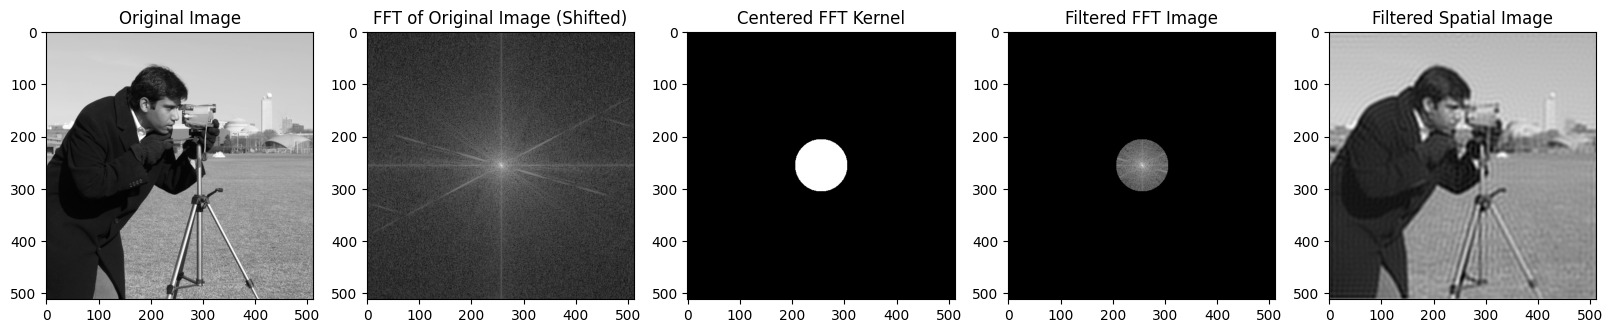

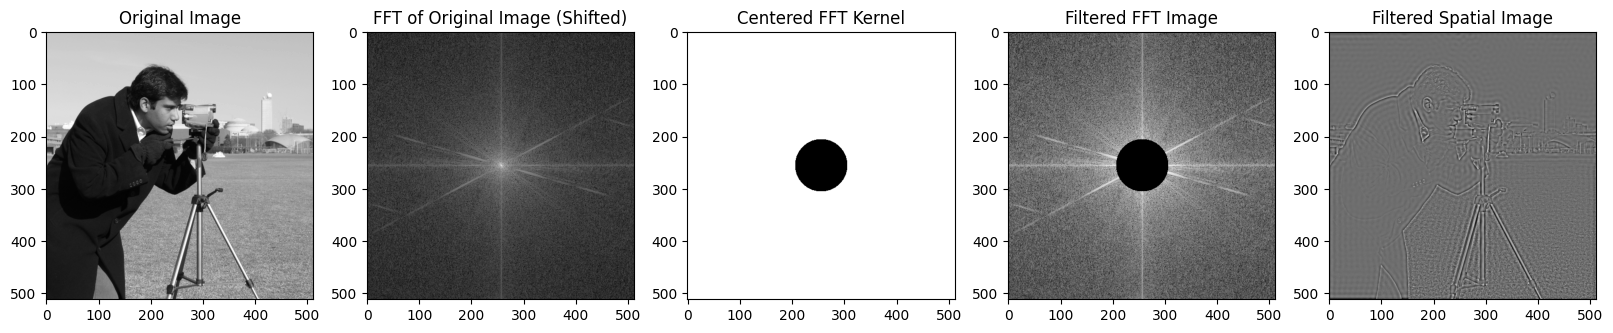

Saving image to: image_processed/camera_low_pass.png
Saving image to: image_processed/camera_high_pass.png


In [66]:
if __name__ == "__main__":
    verbose = True
    # Changing this code should not be needed
    im = skimage.data.camera()
    im = utils.uint8_to_float(im)
    # DO NOT CHANGE
    frequency_kernel_low_pass = utils.create_low_pass_frequency_kernel(im, radius=50)
    image_low_pass = convolve_im_freq(im, frequency_kernel_low_pass,
                                 verbose=verbose)
    # DO NOT CHANGE
    frequency_kernel_high_pass = utils.create_high_pass_frequency_kernel(im, radius=50)
    image_high_pass = convolve_im_freq(im, frequency_kernel_high_pass,
                                  verbose=verbose)

    if verbose:
        plt.show()
    utils.save_im("camera_low_pass.png", image_low_pass)
    utils.save_im("camera_high_pass.png", image_high_pass)